## <center> CNN - Flower Power III </center>

#### Bird's-foot Trefoil, Brown Knapweed, Buttercup(Creeping & Meadow), Chamomile, Common Dandelion,  Common Poppy, Cornflower, Cow Parsley, Cuckooflower, Field Mouse-ear, Flatweed, Hare's-foot clover, Health Spotted Orchid, Hoary Alyssum, Lesser Spearwort,  Marsh Lousewort, Marsh marigold, Meadow Thistle, Ox-eye Daisy, Perforate St John's-wort, Purple Loosestrife, Ragwort, Red Clover, Redstem Filaree, Southern Marsh Orchid, Tansy, Wild Carrot, White Clover, Yarrow, Yellow Loosestrife

In [1]:
import os
import cv2
import numpy as np

x = [] # Feature dataset with images
y = [] # Target dataset with labels


folder_dir = './Flower-Data_CNN'
size = 128 #Crop the image to 128x128
for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("JPG"):
            y.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (size,size))
            x.append(im)
        else:
            continue

In [2]:
# split the dataset into 80% training and 20% test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [3]:
# take a look at one of the images:
X_train[0]

array([[[176, 193, 190],
        [178, 193, 192],
        [153, 175, 169],
        ...,
        [  5,   5,   5],
        [ 10,  15,  12],
        [ 21,  32,  31]],

       [[168, 189, 183],
        [158, 185, 181],
        [142, 172, 167],
        ...,
        [  5,   9,   7],
        [ 19,  28,  24],
        [ 19,  31,  29]],

       [[135, 167, 158],
        [108, 145, 137],
        [ 94, 127, 117],
        ...,
        [ 16,  25,  25],
        [ 17,  28,  27],
        [ 23,  36,  34]],

       ...,

       [[ 67, 101, 129],
        [ 67, 104, 133],
        [ 67, 106, 137],
        ...,
        [ 23,  35,  44],
        [ 47,  72,  79],
        [ 81, 112, 124]],

       [[ 69, 106, 135],
        [ 64, 101, 131],
        [ 66, 101, 130],
        ...,
        [108, 134, 144],
        [ 59,  96, 100],
        [ 88, 120, 128]],

       [[ 17,  33,  41],
        [ 19,  31,  36],
        [ 24,  36,  40],
        ...,
        [ 89, 129, 146],
        [ 65,  99, 104],
        [ 77, 106, 108]]

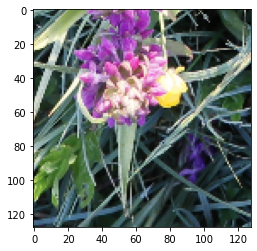

In [4]:
# Show the image
import matplotlib.pyplot as plt
img = plt.imshow(X_train[0])

In [5]:
# Print the label of the image above:
y_train[0]

'Southern Marsh Orchid'

In [6]:
# Convert all the labels in numerical values
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [7]:
y_train

array([24,  3,  1, ...,  5, 20,  5], dtype=int64)

In [8]:
import tensorflow as tf
y_train_one_hot = tf.one_hot(y_train, depth=30)
y_test_one_hot = tf.one_hot(y_test, depth=30)
y_train_one_hot

<tf.Tensor: shape=(5346, 30), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [9]:
# Normalize the pixels in the images to be values between 0 and 1
X_train = np.array(X_train)/255
X_test= np.array(X_test)/255
X_train

array([[[[0.69019608, 0.75686275, 0.74509804],
         [0.69803922, 0.75686275, 0.75294118],
         [0.6       , 0.68627451, 0.6627451 ],
         ...,
         [0.01960784, 0.01960784, 0.01960784],
         [0.03921569, 0.05882353, 0.04705882],
         [0.08235294, 0.1254902 , 0.12156863]],

        [[0.65882353, 0.74117647, 0.71764706],
         [0.61960784, 0.7254902 , 0.70980392],
         [0.55686275, 0.6745098 , 0.65490196],
         ...,
         [0.01960784, 0.03529412, 0.02745098],
         [0.0745098 , 0.10980392, 0.09411765],
         [0.0745098 , 0.12156863, 0.11372549]],

        [[0.52941176, 0.65490196, 0.61960784],
         [0.42352941, 0.56862745, 0.5372549 ],
         [0.36862745, 0.49803922, 0.45882353],
         ...,
         [0.0627451 , 0.09803922, 0.09803922],
         [0.06666667, 0.10980392, 0.10588235],
         [0.09019608, 0.14117647, 0.13333333]],

        ...,

        [[0.2627451 , 0.39607843, 0.50588235],
         [0.2627451 , 0.40784314, 0.52156863]

## Create and build the model

In [10]:
#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, ReduceLROnPlateau

In [11]:
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True)

reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001)

In [12]:
# simple early stopping
# es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [13]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (size,size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(30, activation = "softmax"))

In [14]:
# Adding a learning rate
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [16]:
# compile 
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
batch_size= 32 #64
epochs= 50
history = model.fit(X_train,y_train_one_hot, batch_size=batch_size,
                    epochs = epochs,
                    validation_split=0.3,
                    verbose = 1,
                    callbacks = [reduce_lr, checkpoint])

Epoch 1/50
117/117 [==============================] - 168s 1s/step - loss: 3.3682 - accuracy: 0.0462 - val_loss: 3.2303 - val_accuracy: 0.0854

Epoch 00001: val_loss improved from inf to 3.23028, saving model to model.h5
Epoch 2/50
117/117 [==============================] - 173s 1s/step - loss: 3.1940 - accuracy: 0.0965 - val_loss: 2.9239 - val_accuracy: 0.1646

Epoch 00002: val_loss improved from 3.23028 to 2.92390, saving model to model.h5
Epoch 3/50
117/117 [==============================] - 174s 1s/step - loss: 2.9039 - accuracy: 0.1558 - val_loss: 2.5521 - val_accuracy: 0.2706

Epoch 00003: val_loss improved from 2.92390 to 2.55210, saving model to model.h5
Epoch 4/50
117/117 [==============================] - 174s 1s/step - loss: 2.6848 - accuracy: 0.2141 - val_loss: 2.3546 - val_accuracy: 0.3049

Epoch 00004: val_loss improved from 2.55210 to 2.35464, saving model to model.h5
Epoch 5/50
117/117 [==============================] - 174s 1s/step - loss: 2.5136 - accuracy: 0.2565 - v

117/117 [==============================] - 173s 1s/step - loss: 0.5086 - accuracy: 0.8137 - val_loss: 0.9054 - val_accuracy: 0.7762

Epoch 00039: val_loss did not improve from 0.81528
Epoch 40/50
117/117 [==============================] - 174s 1s/step - loss: 0.4919 - accuracy: 0.8220 - val_loss: 0.9370 - val_accuracy: 0.7650

Epoch 00040: val_loss did not improve from 0.81528
Epoch 41/50
117/117 [==============================] - 174s 1s/step - loss: 0.5255 - accuracy: 0.8132 - val_loss: 0.9393 - val_accuracy: 0.7681

Epoch 00041: val_loss did not improve from 0.81528
Epoch 42/50
117/117 [==============================] - 178s 2s/step - loss: 0.4733 - accuracy: 0.8287 - val_loss: 0.9302 - val_accuracy: 0.7743

Epoch 00042: val_loss did not improve from 0.81528
Epoch 43/50
117/117 [==============================] - 174s 1s/step - loss: 0.4818 - accuracy: 0.8247 - val_loss: 1.1031 - val_accuracy: 0.7550

Epoch 00043: val_loss did not improve from 0.81528
Epoch 44/50
117/117 [===========

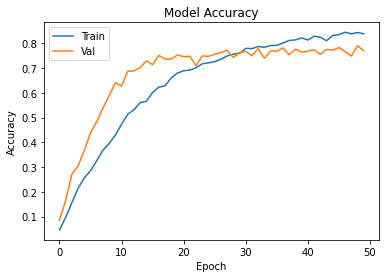

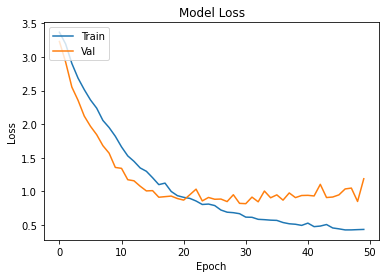

In [17]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [18]:
# Prediction
predict_model = model.predict(np.array(X_train))
predict_model = np.argmax(predict_model, axis=1)
predict_model

array([24,  3,  1, ...,  5, 20,  5], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_train, y_pred = predict_model)

In [20]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
cm_plot_labels = ['Bird\'s-foot Trefoil', 'Brown Knapweed', 'Buttercup', 'Chamomile', 'Common Dandelion', 'Common Poppy', 'Cornflower', 'Cow Parsley',
                             'Cuckooflower', 'Field Mouse-ear', 'Flatweed', 'Hares-foot clover', 'Health Spotted Orchid', 'Hoary Alyssum', 'Lesser Spearwort', 
                             'Marsh Lousewort', 'Marsh marigold', 'Meadow Thistle', 'Ox-eye Daisy', 'Perforate St John\'s-wort', 'Purple Loosestrife','Ragwort', 'Red Clover', 'Redstem Filaree',
                             'Southern Marsh Orchid', 'Tansy', 'White Clover', 'Wild Carrot', 'Yarrow', 'Yellow Loosestrife']

Confusion matrix, without normalization
[[160   0   0   1   7   0   0   0   0   0   3   0   0   0   0   0   4   0
    0   0   0   0   0   0   0   0   0   1   0   1]
 [  0 168   0   0   0   0   0   2   1   0   0   0   3   0   0   6   0   2
    0   0   5   1   1   0   0   1   0   1   0   1]
 [  3   0 165   0   1   0   0   0   0   0  11   0   0   0   1   0   6   0
    0   2   0   0   0   0   0   0   0   0   0   8]
 [  2   1   0 143   0   0   0   2   1   1   3   0   0   1   0   0   0   0
    2   0   0   0   0   0   0   0   0   2   1   1]
 [  2   0   0   0 168   0   0   0   0   0   3   0   0   0   0   0   1   0
    0   0   0   1   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0 187   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 193   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0   0 170   3   0   0   0   2   2   0   0   0   0
    0   0  

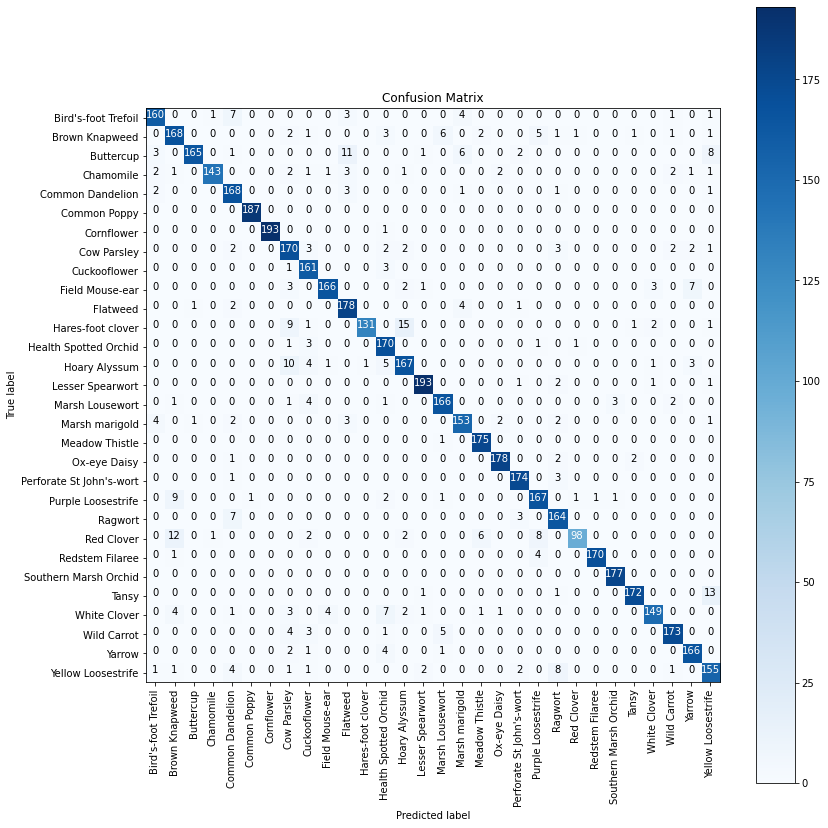

In [22]:
import itertools
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Evaluate the model on the dataset

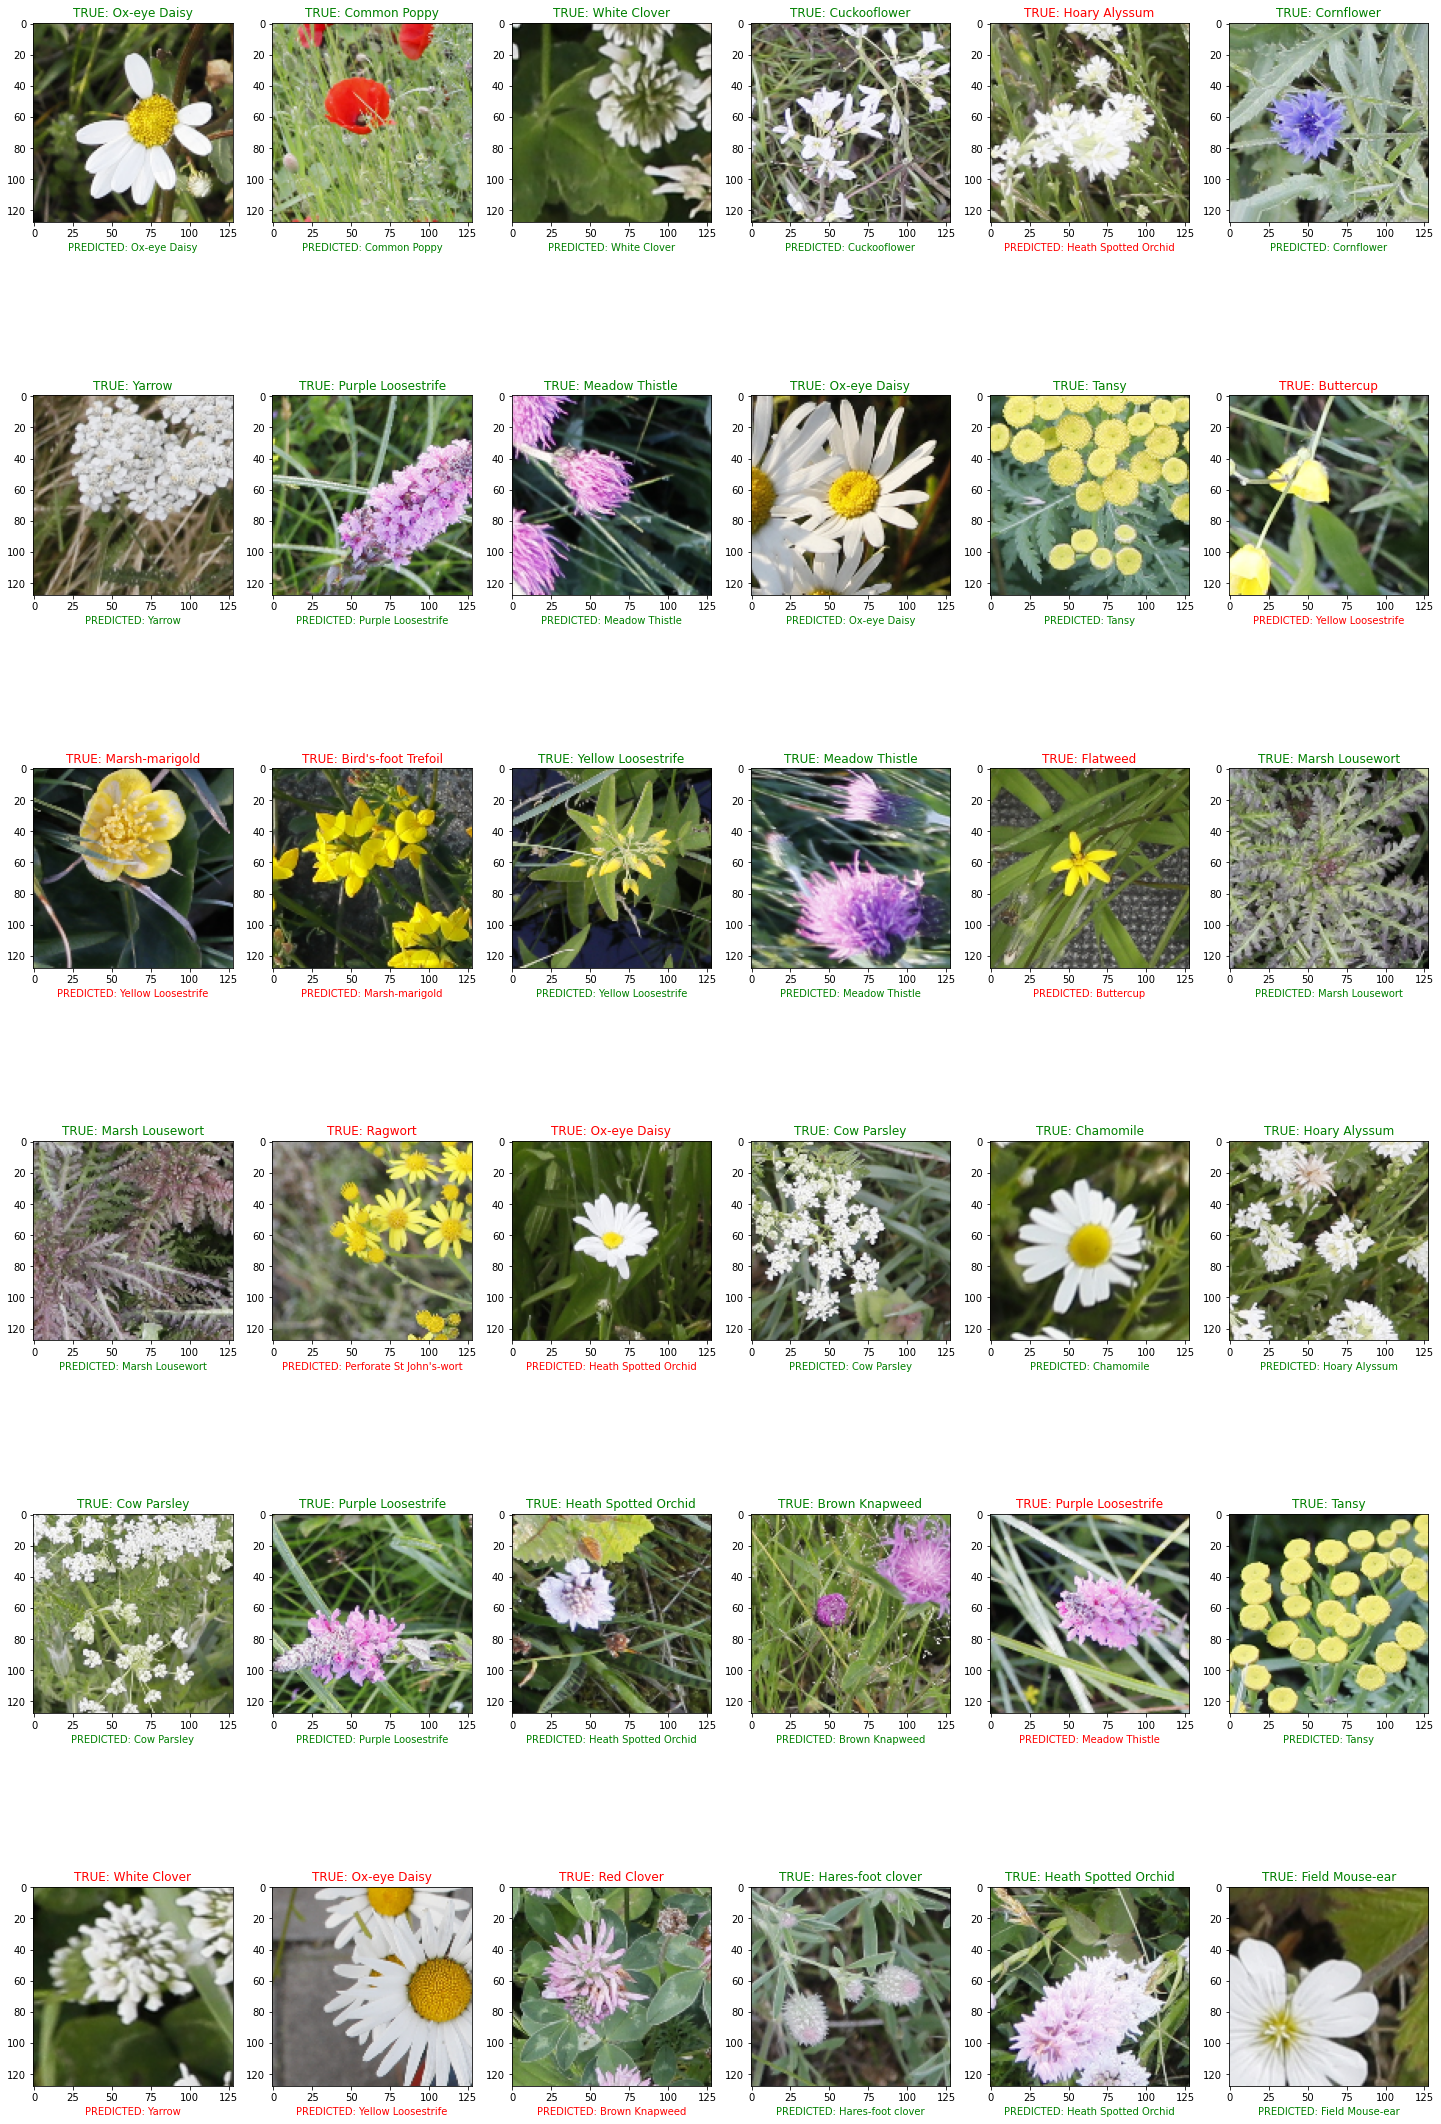

In [23]:
import matplotlib.pyplot as plt
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test_one_hot[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test_one_hot[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test_one_hot[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')

In [21]:
y_test[1]

13

### Evaluate the model on 2 new images 

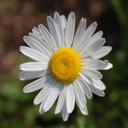

In [92]:
import PIL.Image as Image
SIZE = (128,128)
#insert new Daisy image
new_im = Image.open('Daisy.jpg').resize(SIZE)
new_im

In [93]:
new_im = np.array(new_im)/255
new_im[np.newaxis, ...].shape
result = model.predict(new_im[np.newaxis, ...])
#predict on the new daisy image
predic_label_index = np.argmax(result)
predic_label_index

1

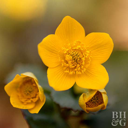

In [94]:
im = Image.open('Marsh.jpg').resize(SIZE)
im

In [95]:
im = np.array(im)/255
im[np.newaxis, ...].shape
result1 = model.predict(im[np.newaxis, ...])
predic_label_index1 = np.argmax(result1)
predic_label_index1

0

Label 0 is for Marsh-marigold and label 1 is for Daisy.